- epoch=1000으로 fix, data의 column 수는 8로 fix, hidden_size=2로 픽스 -> 시각화 가능
- rule-based 방법으로 상위하위 ratio 바꾸기
- 모든 데이터는 하기 어려우니까 tabular simulation dataset을 이용
  - 아래를 통해 원하는 바?

1. epoch 지남에 따라 noise들의 recon-error 변화 -> epoch이 지남에 따라 recon-error가 높아지면 개이득, 꼭 높아지지 않아도 normal data보다 높으면 이득
   - newmodel vs basemodel
2. hidden_size=2 라서 encoder로 inference해서 시각화해서 noise가 어디에 plot되는지 확인
   - newmodel vs basemodel

## 실험 parameter
- `early_stop_round`: 10, 100
- `initial_epochs`: 5, 20
- `sampling_term`: 1, 10
- `rule-based resample ratio` : 0.01, 0.1
- data (12개)
  - train data의 크기: row = 1만개, col = 1만개
  - noise 심한 정도(noise 만들 때 가중평균): 0.1, 0.9
  - noise의 비율: 0.01, 0.1

한번에 다하면 컴퓨터 터지니까
- data는 각각!
- 그러면 data 1개당 16번 NewTrainer * 근데 여러번...3번만할까?

## To do
- 각 모델들마다 errors 결과 pickle로 저장 코드 작성
- 모델을 저장 or encoder inference로 시각화한 사진 저장 코드 작성

## 1.데이터 생성

In [6]:
# from sklearn.datasets import make_classification
# import pandas as pd
# import numpy as np

# # X1, y1 = make_classification(n_samples=int(5000/ 0.7 / 0.9), n_features=8, n_informative=8, n_redundant=0,  n_classes=2, weights=[0.9,0.1], random_state=0)
# X2, y2 = make_classification(n_samples=int(10000/ 0.7 / 0.9), n_features=8, n_informative=8, n_redundant=0,  n_classes=2, weights=[0.9,0.1], random_state=0)

# # print(f'X1 shape = {X1.shape}')
# print(f'X2 shape = {X2.shape}')

X2 shape = (15873, 8)


In [7]:
# import copy

# def contamination(X, y, ratio, weight):
#     tmp_df = pd.DataFrame(X)
#     tmp_df['label'] = y
#     normal = tmp_df.loc[tmp_df['label'] == 0, :].reset_index(drop=True)
#     abnormal = tmp_df.loc[tmp_df['label'] == 1, :].reset_index(drop=True)
    
#     normal_idx = np.arange(len(normal))
#     abnormal_idx = np.arange(len(abnormal))
#     num_contamination = int(ratio * len(abnormal))
    
#     np.random.seed(0)
#     normal_idx = np.random.choice(normal_idx, size=num_contamination, replace=False)
#     abnormal_idx = np.random.choice(abnormal_idx, size=num_contamination, replace=False)
    
#     normal.iloc[normal_idx, :-1] = copy.deepcopy(normal.iloc[normal_idx, :-1].values * (1 - weight))  + copy.deepcopy(abnormal.iloc[abnormal_idx, :-1].values * weight)
#     result_df = pd.concat([normal, abnormal]).reset_index(drop=True)
#     return num_contamination, result_df, normal_idx

In [9]:
import pickle

# # # save
# # with open('data.pickle', 'wb') as f:
# #     pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

# # # load
# # with open('data.pickle', 'rb') as f:
# #     data = pickle.load(f)

In [11]:
# for ratio in [0.07, 0.7]:
#     for weight in [0.1, 0.9]:
#         normal_df1 = pd.DataFrame(X1)
#         normal_df1['label'] = y1

#         num_dirty_1, dirty_df_1, choice_idx_1 = contamination(X1, y1, ratio, weight) # noise는 train, valid 모두에 들어가있다.
#         train_noise = num_dirty_1  / (X1.shape[0] * 0.9 * 0.7)

#         print(f'noise ratio : {ratio}, noise weight : {weight}, train noise ratio = {train_noise:.3f}')
        
#         dirty_df_1.to_csv('./sim_data/dirty_df_1_' + 'ratio' + str(ratio) + '_' + 'weight' + str(weight) + '.csv', index=False)
        
#         with open('./sim_data/' + 'choice_idx_1' + 'ratio' + str(ratio) + '_' + 'weight' + str(weight) + '.pickle', 'wb') as f:
#             pickle.dump(choice_idx_1, f, pickle.HIGHEST_PROTOCOL)


noise ratio : 0.07, noise weight : 0.1, train noise ratio = 0.011
noise ratio : 0.07, noise weight : 0.9, train noise ratio = 0.011
noise ratio : 0.7, noise weight : 0.1, train noise ratio = 0.115
noise ratio : 0.7, noise weight : 0.9, train noise ratio = 0.115


In [12]:
# normal_df2 = pd.DataFrame(X2)
# normal_df2['label'] = y2
# normal_df2.to_csv('./sim_data/normal.csv', index=False)

# for ratio in [0.07, 0.7]:
#     for weight in [0.1, 0.9]:

#         num_dirty_2, dirty_df_2, choice_idx_2 = contamination(X2, y2, ratio, weight) # noise는 train, valid 모두에 들어가있다.
#         train_noise = num_dirty_2  / (X2.shape[0] * 0.9 * 0.7)

#         print(f'noise ratio : {ratio}, noise weight : {weight}, train noise ratio = {train_noise:.3f}')
        
#         dirty_df_2.to_csv('./sim_data/dirty_df_2_' + 'ratio' + str(ratio) + '_' + 'weight' + str(weight) + '.csv', index=False)
        
#         with open('./sim_data/' + 'choice_idx_2' + '_' + 'ratio' + str(ratio) + '_' + 'weight' + str(weight) + '.pickle', 'wb') as f:
#             pickle.dump(choice_idx_2, f, pickle.HIGHEST_PROTOCOL)

noise ratio : 0.07, noise weight : 0.1, train noise ratio = 0.012
noise ratio : 0.07, noise weight : 0.9, train noise ratio = 0.012
noise ratio : 0.7, noise weight : 0.1, train noise ratio = 0.116
noise ratio : 0.7, noise weight : 0.9, train noise ratio = 0.116


# 실험 준비

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [74]:
from copy import deepcopy
import numpy as np
import torch
import wandb
from torch.utils.data import DataLoader
from src.dataload.window_based import WindowBasedDataset, WeightedWindowBasedDataset
from src.dataload.tabular import tabularDataset, WeightedtabularDataset, RatiotabularDateset


def _softmax(recon_error):
    exp_recon_error = np.exp(recon_error - np.max(recon_error))
    return exp_recon_error / np.sum(exp_recon_error)


def _cal_sample_weight(recon_error):
    sample_weight = 1 - _softmax(recon_error)
    sample_weight = sample_weight / np.sum(sample_weight)
    return sample_weight


class BaseTrainer:
    def __init__(self, model, optimizer, crit):
        super().__init__()
        self.model = model
        self.optimizer = optimizer
        self.crit = crit

    def _train(self, train_loader, device):
        self.model.train()
        total_loss = 0
        for input_x, _ in train_loader:
            if device != "cpu":
                input_x = input_x.to(device)
                output_x = input_x.to(device)
            y_hat = self.model(input_x)
            loss = self.crit(y_hat, output_x)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            # prevent memory leak
            total_loss += float(loss)
        return total_loss / len(train_loader)

    def _validate(self, val_loader, device):
        self.model.eval()
        with torch.no_grad():
            total_loss = 0
            for input_x, _ in val_loader:
                if device != "cpu":
                    input_x = input_x.to(device)
                    output_x = input_x.to(device)
                y_hat = self.model(input_x)
                loss = self.crit(y_hat, output_x)
                # prevent memory leak
                total_loss += float(loss)
            return total_loss / len(val_loader)
        
    def _inference(self, train_loader, train_recon_error, config):
        self.model.eval()
        idx = 0
        with torch.no_grad():
            for input_x, _ in train_loader:
                input_x_batch_size = input_x.shape[0]
                if config.device != "cpu":
                    input_x = input_x.to(config.device)
                y_hat = self.model(input_x)
                # calculate train recon error
                anomaly_score = abs(input_x - y_hat)
                mean_anomaly_score = (
                    torch.mean(anomaly_score, 1).detach().to("cpu").numpy()
                )
                train_recon_error[idx : idx + input_x_batch_size] = mean_anomaly_score
                idx += input_x_batch_size
        return train_recon_error


    def train(self, train_loader, val_loader, config, use_wandb):
        lowest_train_loss = np.inf
        lowest_val_loss = np.inf
        best_model = None
        early_stop_round = 0
        return_epoch = 0
        
        data_len = len(train_x)
        train_recon_error = np.zeros(data_len)
        errors = np.zeros((data_len, config.n_epochs))
        errors_idx = 0

        if use_wandb:
            wandb.login()
            wandb.init(project=config.project, config=config)
            wandb.watch(self.model, self.crit, log="gradients", log_freq=100)

        for epoch_index in range(config.n_epochs):
            train_loss = self._train(train_loader, config.device)
            valid_loss = self._validate(val_loader, config.device)
            
            train_recon_error = self._inference(train_loader, train_recon_error, config)
            errors[:, errors_idx] = train_recon_error
            errors_idx += 1
            
            if use_wandb:
                wandb.log({"train_loss": train_loss})
                wandb.log({"valid_loss": valid_loss})

            if valid_loss < lowest_val_loss:
                lowest_train_loss = train_loss
                lowest_val_loss = valid_loss
                best_model = deepcopy(self.model.state_dict())
                early_stop_round = 0
            else:
                early_stop_round += 1
            if early_stop_round == config.early_stop_round:
                print(f"Early Stopped! in Epoch {epoch_index + 1}:")
                print(f"train_loss={train_loss:.3f}, valid_loss={valid_loss:.3f}")
                return_epoch = epoch_index
                break
            if (epoch_index + 1) % 20 == 0:
                print(f"Epoch {epoch_index+1}/{config.n_epochs}:")
                print(f"train_loss={train_loss:.3f}, valid_loss={valid_loss:.3f}")
            return_epoch = epoch_index
        self.model.load_state_dict(best_model)
        return lowest_train_loss, lowest_val_loss, return_epoch, self.model, errors


class NewTrainer:
    def __init__(self, model, optimizer, crit):
        super().__init__()
        self.model = model
        self.optimizer = optimizer
        self.crit = crit

    def _train(self, train_loader, device):
        self.model.train()
        total_loss = 0
        for input_x, _ in train_loader:
            if device != "cpu":
                input_x = input_x.to(device)
                output_x = input_x.to(device)
            y_hat = self.model(input_x)
            loss = self.crit(y_hat, output_x)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            total_loss += float(loss)
        return total_loss / len(train_loader)

    def _validate(self, val_loader, device):
        self.model.eval()
        with torch.no_grad():
            total_loss = 0
            for input_x, _ in val_loader:
                if device != "cpu":
                    input_x = input_x.to(device)
                    output_x = input_x.to(device)
                y_hat = self.model(input_x)
                loss = self.crit(y_hat, output_x)
                # prevent memory leak
                total_loss += float(loss)
            return total_loss / len(val_loader)

    def _inference(self, train_loader, train_recon_error, config):
        self.model.eval()
        idx = 0
        with torch.no_grad():
            for input_x, _ in train_loader:
                input_x_batch_size = input_x.shape[0]
                if config.device != "cpu":
                    input_x = input_x.to(config.device)
                y_hat = self.model(input_x)
                # calculate train recon error
                anomaly_score = abs(input_x - y_hat)
                mean_anomaly_score = (
                    torch.mean(anomaly_score, 1).detach().to("cpu").numpy()
                )
                train_recon_error[idx : idx + input_x_batch_size] = mean_anomaly_score
                idx += input_x_batch_size
        return train_recon_error

    def train(
        self,
        train_x,
        train_y,
        train_loader,
        val_loader,
        sampling_term,
        initial_epochs,
        sample_ratio,
        config,
        use_wandb,
    ):
        lowest_train_loss = np.inf
        lowest_val_loss = np.inf
        best_model = None
        early_stop_round = 0
        return_epoch = 0

        data_len = len(train_x)
        train_recon_error = np.zeros(data_len)
        # sample_weights = np.zeros((data_len, config.n_epochs))
        # sample_weight_idx = 0
        errors = np.zeros((data_len, config.n_epochs))
        errors_idx = 0

        if use_wandb:
            wandb.login()
            wandb.init(project=config.project, config=config)
            wandb.watch(self.model, self.crit, log="gradients", log_freq=100)

        for epoch_index in range(config.n_epochs):
            # sampling
            if (epoch_index >= initial_epochs - 1) and (
                epoch_index % sampling_term == 0
            ):
                train_loss = self._train(train_loader, config.device)
                valid_loss = self._validate(val_loader, config.device)

                ## inference to get train reconstruction error
                train_recon_error = self._inference(train_loader, train_recon_error, config)
                ## calculdate sample weight
                # sample_weight = _cal_sample_weight(train_recon_error)
                # sample_weights[:, sample_weight_idx] = sample_weight
                # sample_weight_idx += 1
                
                errors[:, errors_idx] = train_recon_error
                errors_idx += 1

                # ratio 방법
                tmp = pd.DataFrame(train_recon_error).sort_values(0, ascending=True)
                num = int(len(train_x) * sample_ratio)
                top = tmp[:num].index
                down = tmp[-num:].index
                                
                train_dataset = RatiotabularDateset(train_x, train_y, top, down)
                train_loader = DataLoader(
                    train_dataset, shuffle=False, batch_size=config.batch_size
                )
            # no sampling
            else:
                train_loss = self._train(train_loader, config.device)
                valid_loss = self._validate(val_loader, config.device)

                # inference to get train reconstruction error
                train_recon_error = self._inference(train_loader, train_recon_error, config)

                errors[:, errors_idx] = train_recon_error
                errors_idx += 1
                
            if use_wandb:
                wandb.log({"train_loss": train_loss})
                wandb.log({"valid_loss": valid_loss})

            if valid_loss < lowest_val_loss:
                lowest_train_loss = train_loss
                lowest_val_loss = valid_loss
                best_model = deepcopy(self.model.state_dict())
                early_stop_round = 0
            else:
                early_stop_round += 1
            if early_stop_round == config.early_stop_round:
                print(f"Early Stopped! in Epoch {epoch_index + 1}:")
                print(f"train_loss={train_loss:.3f}, valid_loss={valid_loss:.3f}")
                return_epoch = epoch_index
                break
            if (epoch_index + 1) % 20 == 0:
                print(f"Epoch {epoch_index+1}/{config.n_epochs}:")
                print(f"train_loss={train_loss:.3f}, valid_loss={valid_loss:.3f}")
            return_epoch = epoch_index
        self.model.load_state_dict(best_model)
        return lowest_train_loss, lowest_val_loss, return_epoch, self.model, errors


In [5]:
# from sklearn.manifold import TSNE

# tsne = TSNE(n_components=2, random_state=0)
# X_tsne = tsne.fit_transform(X)
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, s=5)

In [6]:
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, s=5)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def _normalize_tabular(df: pd.DataFrame, label_name: str = "label"):
    scaler = StandardScaler()
    X = scaler.fit_transform(df.drop(label_name, axis=1))
    y = df[label_name]
    return X, y

def simul_split_train_valid_test(df: pd.DataFrame, train_ratio: float = 0.7):
    X, y = _normalize_tabular(df)
    tmp = pd.DataFrame(X)
    tmp["label"] = y
    normal = tmp.loc[tmp["label"] == 0, :].reset_index(drop=True)
    abnormal = tmp.loc[tmp["label"] == 1, :].reset_index(drop=True)
    X_train, X_val_test, y_train, y_val_test = train_test_split(
        normal.drop("label", axis=1),
        normal["label"],
        train_size=train_ratio,
        random_state=42,
        shuffle=False,
    )
    
    X_val, X_test, y_val, y_test = train_test_split(
        X_val_test, y_val_test, train_size=0.5, random_state=42, shuffle=False
    )
    X_test["label"] = y_test
    X_test = pd.concat([X_test, abnormal]).reset_index(drop=True)
    return (
        X_train.values,
        X_val.values,
        X_test.drop("label", axis=1).values,
        y_train.values,
        y_val.values,
        X_test["label"].values,
    )

In [13]:
torch.backends.cudnn.deterministic = True
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)

In [156]:
from argparse import Namespace

config = {
    'trainer_name' : 'BaseTrainer',
    'train_ratio': .7,
    # 'batch_size': 256,
    'batch_size': 512,
    'n_epochs': 1000,
    'early_stop_round': 50,
    'hidden_size': [2],
    'window_size': 60,
    'data': 'tabular',
    # 'sampling_term': [1, 4, 16],
    'sampling_term': [1, 10],
    # 'initial_epochs': [5, 10]
    'initial_epochs': [5, 20],
    'sample_ratio': [0.01, 0.1] # train data에서 noise의 ratio와 동일하게 진행
}

# gpu
gpu_id = 0 if torch.cuda.is_available() else -1

if gpu_id == 0:
    config['device'] = 'cuda:0'
else:
    config['device'] = 'cpu'

config = Namespace(**config)

print(config)

Namespace(batch_size=512, data='tabular', device='cuda:0', early_stop_round=50, hidden_size=[2], initial_epochs=[5, 10], n_epochs=1000, sampling_term=[1, 4], train_ratio=0.7, trainer_name='BaseTrainer', window_size=60)


In [72]:

from src.models.BaseAutoEncoder import BaseSeq2Seq
from src.dataload.tabular import tabularDataset
from src.utils import inference

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim
import numpy as np
import random

In [13]:
import os

PATH = './sim_data'
file_list = os.listdir(PATH)
file_list_csv = [file for file in file_list if file.endswith('.csv')]
file_list_csv

['dirty_df_2_ratio0.07_weight0.1.csv',
 'dirty_df_2_ratio0.07_weight0.9.csv',
 'dirty_df_2_ratio0.7_weight0.1.csv',
 'dirty_df_2_ratio0.7_weight0.9.csv',
 'normal.csv']

In [15]:
normal = pd.read_csv('./sim_data/normal.csv')
normal.head(3)

,0,1,2,3,4,5,6,7,label
0,-1.623923,1.005869,-1.599885,2.147659,0.897525,4.020646,-2.169920,-0.868779,0
1,0.330475,2.783799,-0.957341,-1.377917,-0.572619,0.354019,1.190833,-0.493337,0
2,-2.046333,2.951445,-2.966678,-0.660674,2.178736,-2.544646,2.013580,0.688096,0


In [157]:
config.data_name = "normal"

(
    train_x,
    valid_x,
    test_x,
    train_y,
    valid_y,
    test_y,
) = simul_split_train_valid_test(normal, config.train_ratio)
# resize 'window_size' = 'col_len'
config.window_size = train_x.shape[1]

train_dataset = tabularDataset(train_x, train_y)
valid_dataset = tabularDataset(valid_x, valid_y)

train_dataloader = DataLoader(
    train_dataset, shuffle=False, batch_size=config.batch_size
)
valid_dataloader = DataLoader(
    valid_dataset, shuffle=False, batch_size=config.batch_size
)

total_x = np.concatenate([train_x, valid_x, test_x])
total_y = np.concatenate([train_y, valid_y, test_y])
IR = round((len(total_y) - np.sum(total_y)) / np.sum(total_y), 4)
# for inference
total_dataset = tabularDataset(total_x, total_y)
total_dataloader = DataLoader(
    total_dataset, shuffle=False, batch_size=config.batch_size
)

for hidden_size in config.hidden_size:
    print(f"-----BaseTrainer starts with hidden_size={hidden_size}-----")
    config.trainer_name = "BaseTrainer"

    model = BaseSeq2Seq(
        input_size=config.window_size,
        hidden_size=hidden_size,
        output_size=config.window_size,
        dropout_p=0.2,
    ).to(config.device)

    optimizer = optim.Adam(model.parameters())
    criterion = nn.MSELoss()

    # train
    trainer = BaseTrainer(model=model, optimizer=optimizer, crit=criterion)

    train_loss, val_loss, return_epoch, best_model, errors = trainer.train(
        train_loader=train_dataloader,
        val_loader=valid_dataloader,
        config=config,
        use_wandb=False,
    )

    with open('./errors/Base_'+ config.data_name + '.pickle', 'wb') as f:
        pickle.dump(errors, f, pickle.HIGHEST_PROTOCOL)

    best_model.to("cpu")
    
    torch.save({
            'epoch': return_epoch,
            'model_state_dict': best_model.state_dict(),
            'train_loss': train_loss,
            'val_loss': val_loss
            }, './sim_data/' + 'Base_'+ config.data_name + '.tar')
    
    sampling_term = 0
    PATH = "./run_results_sim/"
    df = inference(
        config,
        total_dataloader,
        best_model,
        train_x,
        valid_x,
        total_x,
        total_y,
        return_epoch,
        hidden_size,
        train_loss,
        val_loss,
        IR,
        sampling_term,
        PATH
    )

    df.to_csv(PATH + "result_" + config.data_name + ".csv", index=False)

for sample_ratio in config.sample_ratio:
    for initial_epochs in config.initial_epochs: 
        for hidden_size in config.hidden_size:
                    for sampling_term in config.sampling_term:
                        print(
                            f"-----NewTrainer starts with hidden_size={hidden_size}, sampling_term={sampling_term}-----"
                        )
                        config.trainer_name = "NewTrainer"

                        model = BaseSeq2Seq(
                            input_size=config.window_size,
                            hidden_size=hidden_size,
                            output_size=config.window_size,
                            dropout_p=0.2,
                        ).to(config.device)

                        optimizer = optim.Adam(model.parameters())
                        criterion = nn.MSELoss()

                        # train
                        trainer = NewTrainer(model=model, optimizer=optimizer, crit=criterion)

                        train_loss, val_loss, return_epoch, best_model, errors = trainer.train(
                            train_x=train_x,
                            train_y=train_y,
                            train_loader=train_dataloader,
                            val_loader=valid_dataloader,
                            config=config,
                            sampling_term=sampling_term,
                            initial_epochs=initial_epochs,
                            sample_ratio=sample_ratio,
                            use_wandb=False,
                        )
                        
                        with open('./errors/New_'+ config.data_name + '_sam' + str(sample_ratio) + '_init' + str(initial_epochs) + '.pickle', 'wb') as f:
                            pickle.dump(errors, f, pickle.HIGHEST_PROTOCOL)
                        
                        best_model.to("cpu")
                        torch.save({
                            'epoch': return_epoch,
                            'model_state_dict': best_model.state_dict(),
                            'train_loss': train_loss,
                            'val_loss': val_loss
                            }, './sim_data/' + 'Base_'+ config.data_name + '.tar')
                        
                        PATH = "./run_results_sim/"
                        df = inference(
                            config,
                            total_dataloader,
                            best_model,
                            train_x,
                            valid_x,
                            total_x,
                            total_y,
                            return_epoch,
                            hidden_size,
                            train_loss,
                            val_loss,
                            IR,
                            sampling_term,
                            PATH
                        )
                        df.to_csv(PATH + "result_" + config.data_name + ".csv", index=False)

<ipython-input-7-c9eb5218e970>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["label"] = y_test


-----BaseTrainer starts with hidden_size=2-----
Epoch 20/1000:
train_loss=0.744, valid_loss=0.700
Epoch 40/1000:
train_loss=0.722, valid_loss=0.680
Epoch 60/1000:
train_loss=0.717, valid_loss=0.673
Epoch 80/1000:
train_loss=0.716, valid_loss=0.671
Epoch 100/1000:
train_loss=0.715, valid_loss=0.674
Early Stopped! in Epoch 117:
train_loss=0.712, valid_loss=0.670
-----NewTrainer starts with hidden_size=2, sampling_term=1-----
Epoch 20/1000:
train_loss=0.555, valid_loss=0.670
Epoch 40/1000:
train_loss=0.542, valid_loss=0.654
Epoch 60/1000:
train_loss=0.537, valid_loss=0.651
Epoch 80/1000:
train_loss=0.539, valid_loss=0.648
Epoch 100/1000:
train_loss=0.538, valid_loss=0.647
Epoch 120/1000:
train_loss=0.537, valid_loss=0.649
Epoch 140/1000:
train_loss=0.532, valid_loss=0.648
Epoch 160/1000:
train_loss=0.532, valid_loss=0.646
Epoch 180/1000:
train_loss=0.532, valid_loss=0.645
Early Stopped! in Epoch 192:
train_loss=0.532, valid_loss=0.646
-----NewTrainer starts with hidden_size=2, sampling_te

In [ ]:
# 모델 불러오기
model = TheModelClass(*args, **kwargs)

checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
epoch = checkpoint['epoch']

In [158]:
tmp = pd.DataFrame(train_x)
tmp['noise'] = 0

In [159]:
idx = []
for i in choice_idx_30:
    if i < len(tmp):
        idx.append(i)

print(len(choice_idx_30))
print(len(idx))

4675
3237


In [160]:
tmp.loc[idx, 'noise'] = 1

In [168]:
n0 = []
n1 = []
for i in range(20):
    tmp['errors'] = errors[:, i]
    noise0 = tmp.groupby('noise')['errors'].mean()[0]
    noise1 = tmp.groupby('noise')['errors'].mean()[1]
    n0.append(noise0)
    n1.append(noise1)

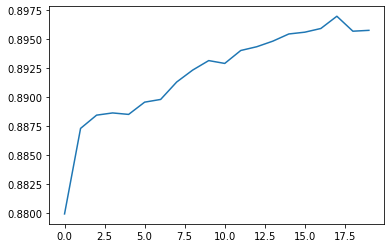

In [169]:
plt.plot(n1)

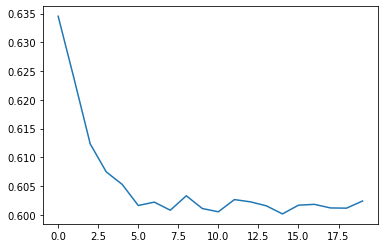

In [170]:
plt.plot(n0)

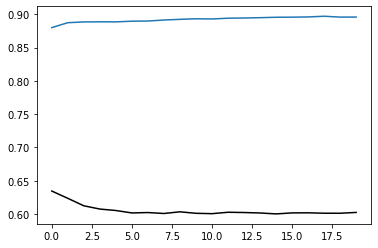

In [171]:
plt.plot(n0, c='k')
plt.plot(n1)

In [108]:
sorted_tmp = tmp.sort_values('errors', ascending=False).reset_index(drop=True)
top10 = sorted_tmp.iloc[:600, -2].values
down10 = sorted_tmp.iloc[-600:, -2].values

print(np.sum(top10))
print(np.sum(down10))

15
23


In [ ]:
def _softmax(recon_error):
    exp_recon_error = np.exp(recon_error - np.max(recon_error))
    return exp_recon_error / np.sum(exp_recon_error)


def cal_sample_weight(recon_error):
    sample_weight = 1 - _softmax(recon_error)
    sample_weight = sample_weight / np.sum(sample_weight)
    return sample_weight

In [ ]:
# w0 = cal_sample_weight(sample_weights[:, 0])
# plt.hist(w0, bins=50, alpha=0.4)
# w100 = cal_sample_weight(sample_weights[:, 100])
# plt.hist(w0, bins=50, alpha=0.4)
# w300 = cal_sample_weight(sample_weights[:, 300])
# plt.hist(w0, bins=50, alpha=0.4)

In [ ]:
remain_data = []
n_uniq = 0
for i in range(sample_weights.shape[1]):
    if sample_weights[:, i].sum() == 0.0:
        continue
    w = cal_sample_weight(sample_weights[:, i])
    for _ in range(100):
        result = np.random.choice(np.arange(len(w)), size=len(w), p=w, replace=True)
        n_uniq += int(pd.Series(result).nunique() / 100)
        remain_data.append(n_uniq)
    n_uniq = 0

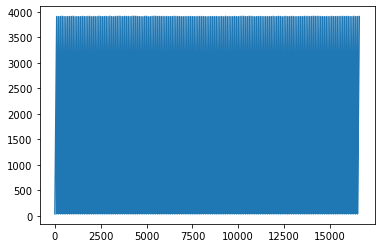

In [ ]:
plt.plot(remain_data)

# 노이즈 데이터가 정말 나가리 되는지 시각화 확인
- 일단 지금은 잘 안됨
  - initial epoch를 더 짧게?
- + 반대로 test 데이터에 normal에 가까운 abnormal이 있다면?? 어떻게 될까

In [ ]:
tmp_df = pd.DataFrame(X2)
tmp_df['label'] = y2
normal = tmp_df.loc[tmp_df['label'] == 0, :].reset_index(drop=True)
abnormal = tmp_df.loc[tmp_df['label'] == 1, :].reset_index(drop=True)
idx = np.arange(len(abnormal))
num_contamination = int(0.9 * len(abnormal))
np.random.seed(0)
choice_idx = np.random.choice(idx, num_contamination, replace=False)
normal.iloc[choice_idx, :-1] = (normal.iloc[choice_idx, :-1] + abnormal.iloc[choice_idx, :-1]) / 2
result_df = pd.concat([normal, abnormal]).reset_index(drop=True)
result_df['noise'] = 0
result_df.iloc[choice_idx, -1] = 1

In [ ]:
result_df.shape

(10000, 10)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(result_df.iloc[:, 0:-2])
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=result_df['noise'], s=5)

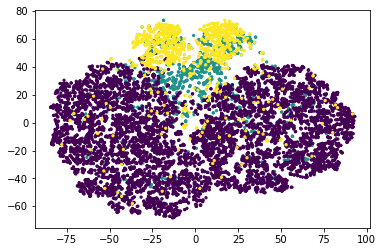

In [ ]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=result_df['noise']+result_df['label']*2, s=5)

In [ ]:
(
    train_x,
    valid_x,
    test_x,
    train_y,
    valid_y,
    test_y,
) = simul_split_train_valid_test(result_df, 0.7)

<ipython-input-5-2e5b80c201c4>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["label"] = y_test


In [ ]:
train_x.shape

(6265, 9)

In [ ]:
pd.Series(train_x[:,-1]).value_counts()

-0.322863    5321
 3.097292     944
dtype: int64

- 아래의 경우 noise의 갯수 100번 돌려서 평균내자

In [ ]:
mean0 = 0
w = cal_sample_weight(sample_weights[:, 0])
for _ in range(1000):
    result = np.random.choice(np.arange(len(w)), size=len(w), p=w, replace=True)
    mean0 += pd.Series(train_x[result,-1]).value_counts().values[1] /1000
print(mean0)
mean0 = 0
w = cal_sample_weight(sample_weights[:, 2])
for _ in range(1000):
    result = np.random.choice(np.arange(len(w)), size=len(w), p=w, replace=True)
    mean0 += pd.Series(train_x[result,-1]).value_counts().values[1] /1000
print(mean0)
mean0 = 0
w = cal_sample_weight(sample_weights[:, 3])
for _ in range(1000):
    result = np.random.choice(np.arange(len(w)), size=len(w), p=w, replace=True)
    mean0 += pd.Series(train_x[result,-1]).value_counts().values[1] /1000
print(mean0)

943.7129999999994
943.3580000000007
941.8589999999999


In [ ]:
w = cal_sample_weight(sample_weights[:, 0])
result = np.random.choice(np.arange(len(w)), size=len(w), p=w, replace=True)
pd.Series(train_x[result,-1]).value_counts()

-0.322863    5292
 3.097292     973
dtype: int64

In [ ]:
w = cal_sample_weight(sample_weights[:, 100])
result = np.random.choice(np.arange(len(w)), size=len(w), p=w, replace=True)
pd.Series(train_x[result,-1]).value_counts()

-0.322863    5351
 3.097292     914
dtype: int64

In [ ]:
w = cal_sample_weight(sample_weights[:, 5])
tmp = pd.DataFrame(train_x[result,-1])
tmp['w']=w

In [ ]:
import seaborn as sns

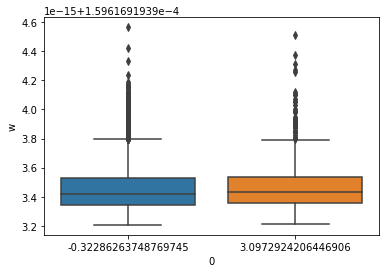

In [ ]:
sns.boxplot(data=tmp, x=0,  y='w')

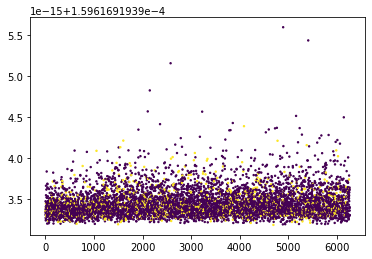

In [ ]:
plt.scatter(np.arange(len(w)), w, s=2, c=tmp[0])

In [ ]:
train_x.shape

(6265, 9)

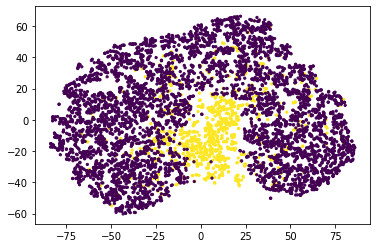

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(pd.DataFrame(train_x).iloc[:, 0:-1])
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=pd.DataFrame(train_x).iloc[:, -1], s=5)

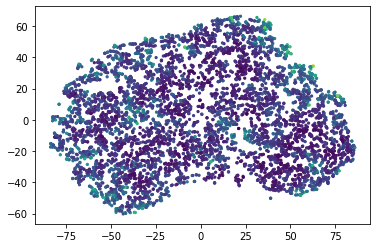

In [ ]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=w*10000, s=5)

In [ ]:
w = cal_sample_weight(sample_weights[:, 150])
result = np.random.choice(np.arange(len(w)), size=len(w), p=w, replace=True)
pd.Series(train_x[result,-1]).value_counts()

-0.322863    5351
 3.097292     914
dtype: int64

In [ ]:
train_x[result,-1]

In [ ]:
# pd.read_csv('./run_results_sim/result_normal_df.csv')

In [ ]:
# pd.read_csv('./run_results_sim/result_dirty_df_10.csv')

In [ ]:
# pd.read_csv('./run_results_sim/result_dirty_df_20.csv')

In [ ]:
# pd.read_csv('./run_results_sim/result_dirty_df_30.csv')

In [ ]:
# pd.read_csv('./run_results_sim/result_flip_df_1.csv')

In [ ]:
# pd.read_csv('./run_results_sim/result_flip_df_05.csv')

In [ ]:
# pd.read_csv('./run_results_sim/result_normal_df2.csv')

In [ ]:
# pd.read_csv('./run_results_sim/result_normal_df2.csv')

In [ ]:
df30 = pd.read_csv('./run_results_sim/result_dirty_df_30_2_init10_sam1.csv')
# df30.groupby(['trainer_name','sampling_term'])[['roc_auc','pr_auc']].mean()
df30[['trainer_name','roc_auc','pr_auc']]

,trainer_name,roc_auc,pr_auc
0,BaseTrainer,0.8571,0.8272
1,NewTrainer,0.8545,0.8252
2,NewTrainer,0.8365,0.8070
3,NewTrainer,0.8421,0.8031
4,NewTrainer,0.8354,0.7987
5,NewTrainer,0.8304,0.7923
6,NewTrainer,0.8427,0.8085
7,BaseTrainer,0.8437,0.8087
8,NewTrainer,0.8367,0.8011
9,NewTrainer,0.8333,0.7958


In [ ]:
df10 = pd.read_csv('./run_results_sim/result_normal_df2.csv')
df10.groupby(['trainer_name','sampling_term'])[['roc_auc','pr_auc']].mean()

roc_auc    pr_auc
trainer_name sampling_term                    
BaseTrainer  0              0.855850  0.823075
NewTrainer   1              0.862825  0.833050
             4              0.863050  0.832175
             16             0.859600  0.829025

In [ ]:
df10 = pd.read_csv('./run_results_sim/result_dirty_df_10_2.csv')
df10.groupby(['trainer_name','sampling_term'])[['roc_auc','pr_auc']].mean()

roc_auc    pr_auc
trainer_name sampling_term                    
BaseTrainer  0              0.857425  0.828050
NewTrainer   1              0.856125  0.823875
             4              0.861475  0.836175
             16             0.858675  0.824625

In [ ]:
df10 = pd.read_csv('./run_results_sim/result_dirty_df_10.csv')
df10.groupby(['trainer_name','sampling_term'])[['roc_auc','pr_auc']].mean()

roc_auc   pr_auc
trainer_name sampling_term                   
BaseTrainer  0              0.858925  0.82775
NewTrainer   1              0.856150  0.83250
             4              0.831250  0.80120
             16             0.850750  0.82325

In [ ]:
df30 = pd.read_csv('./run_results_sim/result_dirty_df_30.csv')
df30.groupby(['trainer_name','sampling_term'])[['roc_auc','pr_auc']].mean()

roc_auc    pr_auc
trainer_name sampling_term                    
BaseTrainer  0              0.817133  0.782333
NewTrainer   1              0.834667  0.804367
             4              0.801533  0.764400
             16             0.814667  0.782300

{'whiskers': [<matplotlib.lines.Line2D at 0x20cc80a3880>,
 'caps': [<matplotlib.lines.Line2D at 0x20c9a0c6100>,
 'boxes': [<matplotlib.lines.Line2D at 0x20cc80a3b20>],
 'medians': [<matplotlib.lines.Line2D at 0x20cc8080160>],
 'fliers': [<matplotlib.lines.Line2D at 0x20cc8080670>],
 'means': []}

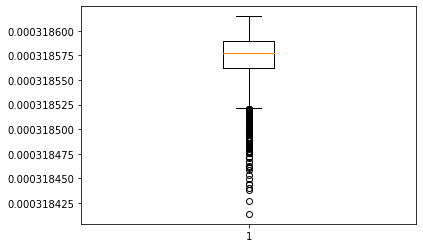

In [ ]:
plt.boxplot(sample_weights[:, 0])

{'whiskers': [<matplotlib.lines.Line2D at 0x20ceb071970>,
 'caps': [<matplotlib.lines.Line2D at 0x20ceb07d070>,
 'boxes': [<matplotlib.lines.Line2D at 0x20ceb071670>],
 'medians': [<matplotlib.lines.Line2D at 0x20ceb07d730>],
 'fliers': [<matplotlib.lines.Line2D at 0x20ceb07da30>],
 'means': []}

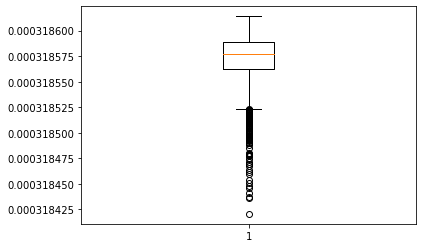

In [ ]:
plt.boxplot(sample_weights[:,100])